In [1]:
import pandas as pd
import numpy as np

from scipy.stats import norm
from matplotlib import pyplot as plt

import matplotlib.mlab as mlab

In [2]:
iris_raw = pd.read_csv('iris_comma_delimited.csv')

In [3]:
iris_raw

,sepal_length,sepal_width,petal_length,petal_width,species,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,5.1,3.5,1.4,0.2,setosa,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN,NaN,NaN,NaN
2,4.7,3.2,1.3,0.2,setosa,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,setosa,NaN,NaN,average_sepal_length,5.843333
4,5.0,3.6,1.4,0.2,setosa,NaN,NaN,average_sepal_width,3.054000
5,5.4,3.9,1.7,0.4,setosa,NaN,NaN,average_petal_length,3.758667
6,4.6,3.4,1.4,0.3,setosa,NaN,NaN,average_petal_width,1.198667
7,5.0,3.4,1.5,0.2,setosa,NaN,NaN,NaN,NaN
8,4.4,2.9,1.4,0.2,setosa,NaN,NaN,NaN,NaN
9,4.9,3.1,1.5,0.1,setosa,NaN,NaN,NaN,NaN


In [4]:
iris_raw.drop(['Unnamed: 5', 'Unnamed: 6'], axis = 1)

,sepal_length,sepal_width,petal_length,petal_width,species,Unnamed: 7,Unnamed: 8
0,5.1,3.5,1.4,0.2,setosa,NaN,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN,NaN
2,4.7,3.2,1.3,0.2,setosa,NaN,NaN
3,4.6,3.1,1.5,0.2,setosa,average_sepal_length,5.843333
4,5.0,3.6,1.4,0.2,setosa,average_sepal_width,3.054000
5,5.4,3.9,1.7,0.4,setosa,average_petal_length,3.758667
6,4.6,3.4,1.4,0.3,setosa,average_petal_width,1.198667
7,5.0,3.4,1.5,0.2,setosa,NaN,NaN
8,4.4,2.9,1.4,0.2,setosa,NaN,NaN
9,4.9,3.1,1.5,0.1,setosa,NaN,NaN


In [5]:
iris_setosa = iris_raw[iris_raw.species == 'setosa']

setosa_sepal_length = iris_setosa.sepal_length
setosa_sepal_width = iris_setosa.sepal_width
setosa_petal_length = iris_setosa.petal_length
setosa_petal_width = iris_setosa.petal_width

setosa_mean_sepal_length = np.mean(setosa_sepal_length)
setosa_mean_sepal_width = np.mean(setosa_sepal_width)
setosa_mean_petal_length = np.mean(setosa_petal_length)
setosa_mean_petal_width = np.mean(setosa_petal_width)

setosa_std_sepal_length = np.std(setosa_sepal_length)
setosa_std_sepal_width = np.std(setosa_sepal_width)
setosa_std_petal_length = np.std(setosa_petal_length)
setosa_std_petal_width = np.std(setosa_petal_width)

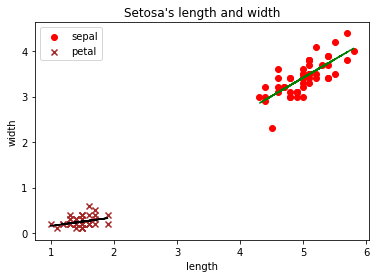

In [6]:
plt.scatter(setosa_sepal_length, setosa_sepal_width,c="red", label = "sepal")
plt.scatter(setosa_petal_length, setosa_petal_width, marker="x", c="brown", label = "petal")

defn = ("sepal", "petal")
plt.legend(defn)

l1 = np.polyfit(setosa_sepal_length, setosa_sepal_width, 1)
plt.plot(setosa_sepal_length, np.polyval(l1,setosa_sepal_length), 'r--', color = "green")

l2 = np.polyfit(setosa_petal_length, setosa_petal_width, 1)
plt.plot(setosa_petal_length, np.polyval(l2,setosa_petal_length), 'r--', color = "black")

plt.xlabel("length")
plt.ylabel("width")
plt.title("Setosa's length and width")
plt.show()

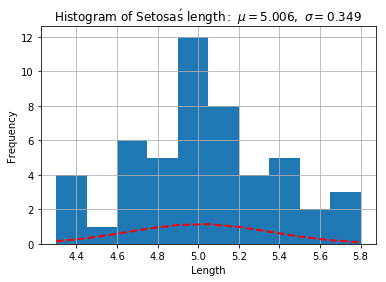

In [7]:
n, bins, patches = plt.hist(setosa_sepal_length)

(mu,sigma) = norm.fit(setosa_sepal_length)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.grid(True)
plt.title(r'$\mathrm{Histogram\ of\ Setosa\'s\ length :}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [8]:
iris_versicolor = iris_raw[iris_raw.species == 'versicolor']

versicolor_sepal_length = iris_versicolor.sepal_length
versicolor_sepal_width = iris_versicolor.sepal_width
versicolor_petal_length = iris_versicolor.petal_length
versicolor_petal_width = iris_versicolor.petal_width

versicolor_mean_sepal_length = np.mean(versicolor_sepal_length)
versicolor_mean_sepal_width = np.mean(versicolor_sepal_width)
versicolor_mean_petal_length = np.mean(versicolor_petal_length)
versicolor_mean_petal_width = np.mean(versicolor_petal_width)

versicolor_std_sepal_length = np.std(versicolor_sepal_length)
versicolor_std_sepal_width = np.std(versicolor_sepal_width)
versicolor_std_petal_length = np.std(versicolor_petal_length)
versicolor_std_petal_width = np.std(versicolor_petal_width)

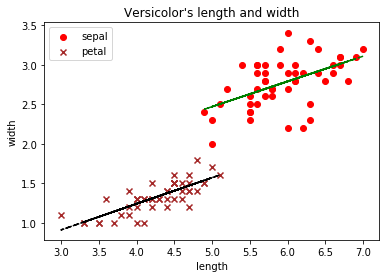

In [9]:
plt.scatter(versicolor_sepal_length, versicolor_sepal_width,c="red", label = "sepal")
plt.scatter(versicolor_petal_length, versicolor_petal_width, marker="x", c="brown", label = "petal")

defn = ("sepal", "petal")
plt.legend(defn)

l1 = np.polyfit(versicolor_sepal_length, versicolor_sepal_width, 1)
plt.plot(versicolor_sepal_length, np.polyval(l1,versicolor_sepal_length), 'r--', color = "green")

l2 = np.polyfit(versicolor_petal_length, versicolor_petal_width, 1)
plt.plot(versicolor_petal_length, np.polyval(l2,versicolor_petal_length), 'r--', color = "black")

plt.xlabel("length")
plt.ylabel("width")
plt.title("Versicolor's length and width")
plt.show()

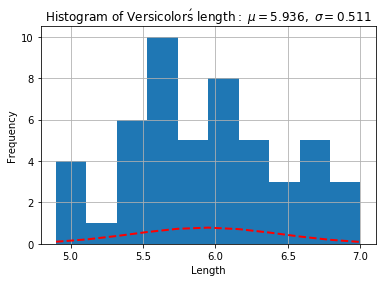

In [10]:
n, bins, patches = plt.hist(versicolor_sepal_length)

(mu,sigma) = norm.fit(versicolor_sepal_length)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.grid(True)
plt.title(r'$\mathrm{Histogram\ of\ Versicolor\'s\ length :}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
iris_virginica = iris_raw[iris_raw.species == 'virginica']

virginica_sepal_length = iris_virginica.sepal_length
virginica_sepal_width = iris_virginica.sepal_width
virginica_petal_length = iris_virginica.petal_length
virginica_petal_width = iris_virginica.petal_width

virginica_mean_sepal_length = np.mean(virginica_sepal_length)
virginica_mean_sepal_width = np.mean(virginica_sepal_width)
virginica_mean_petal_length = np.mean(virginica_petal_length)
virginica_mean_petal_width = np.mean(virginica_petal_width)

virginica_std_sepal_length = np.std(virginica_sepal_length)
virginica_std_sepal_width = np.std(virginica_sepal_width)
virginica_std_petal_length = np.std(virginica_petal_length)
virginica_std_petal_width = np.std(virginica_petal_width)

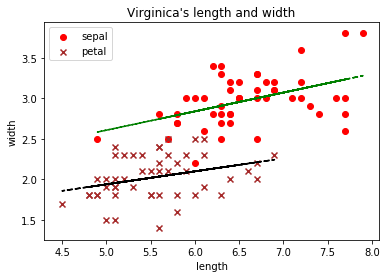

In [12]:
plt.scatter(virginica_sepal_length, virginica_sepal_width,c="red", label = "sepal")
plt.scatter(virginica_petal_length, virginica_petal_width, marker="x", c="brown", label = "petal")

defn = ("sepal", "petal")
plt.legend(defn)

l1 = np.polyfit(virginica_sepal_length, virginica_sepal_width, 1)
plt.plot(virginica_sepal_length, np.polyval(l1,virginica_sepal_length), 'r--', color = "green")

l2 = np.polyfit(virginica_petal_length, virginica_petal_width, 1)
plt.plot(virginica_petal_length, np.polyval(l2,virginica_petal_length), 'r--', color = "black")

plt.xlabel("length")
plt.ylabel("width")
plt.title("Virginica's length and width")
plt.show()

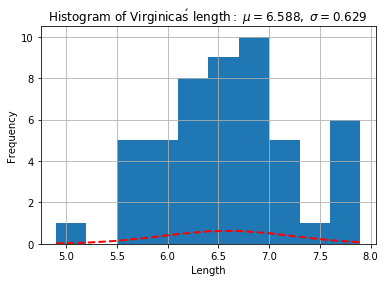

In [13]:
n, bins, patches = plt.hist(virginica_sepal_length)

(mu,sigma) = norm.fit(virginica_sepal_length)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.grid(True)
plt.title(r'$\mathrm{Histogram\ of\ Virginica\'s\ length :}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

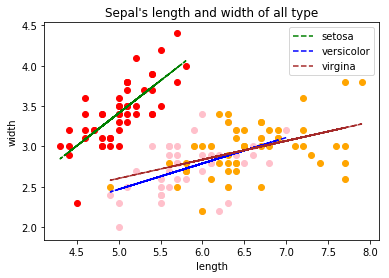

In [19]:
plt.scatter(setosa_sepal_length, setosa_sepal_width,c="red", label = "setosa")

plt.scatter(versicolor_sepal_length, versicolor_sepal_width,c="pink", label = "versicolor")

plt.scatter(virginica_sepal_length, virginica_sepal_width,c="orange", label = "virgina")

l1 = np.polyfit(setosa_sepal_length, setosa_sepal_width, 1)
plt.plot(setosa_sepal_length, np.polyval(l1,setosa_sepal_length), 'r--', color = "green")

l2 = np.polyfit(versicolor_sepal_length, versicolor_sepal_width, 1)
plt.plot(versicolor_sepal_length, np.polyval(l2,versicolor_sepal_length), 'r--', color = "blue")

l3 = np.polyfit(virginica_sepal_length, virginica_sepal_width, 1)
plt.plot(virginica_sepal_length, np.polyval(l3,virginica_sepal_length), 'r--', color = "brown")

defn = ("setosa", "versicolor", "virgina")
plt.legend(defn)

plt.xlabel("length")
plt.ylabel("width")
plt.title("Sepal's length and width of all type")
plt.show()

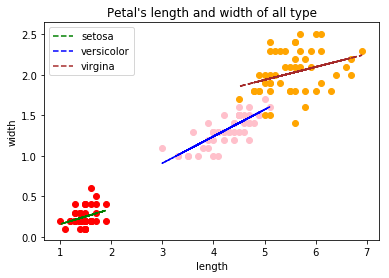

In [20]:
plt.scatter(setosa_petal_length, setosa_petal_width,c="red", label = "setosa")

plt.scatter(versicolor_petal_length, versicolor_petal_width,c="pink", label = "versicolor")

plt.scatter(virginica_petal_length, virginica_petal_width,c="orange", label = "virgina")

l1 = np.polyfit(setosa_petal_length, setosa_petal_width, 1)
plt.plot(setosa_petal_length, np.polyval(l1,setosa_petal_length), 'r--', color = "green")

l2 = np.polyfit(versicolor_petal_length, versicolor_petal_width, 1)
plt.plot(versicolor_petal_length, np.polyval(l2,versicolor_petal_length), 'r--', color = "blue")

l3 = np.polyfit(virginica_petal_length, virginica_petal_width, 1)
plt.plot(virginica_petal_length, np.polyval(l3,virginica_petal_length), 'r--', color = "brown")

defn = ("setosa", "versicolor", "virgina")
plt.legend(defn)

plt.xlabel("length")
plt.ylabel("width")
plt.title("Petal's length and width of all type")
plt.show()